In [656]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import re
from scipy.stats import chi2_contingency

salary_df = pd.read_csv("Data_Exploration/Salary.csv")
male_df = salary_df[salary_df.Gender == "Male"]
female_df = salary_df[salary_df.Gender == "Female"]

In [657]:

#* Functions 
def age_group_funct(age):
    if 19 < age < 30:
        return "20 - 29"
    elif 29 < age < 40:
        return "30 - 39"
    elif 39 < age < 50:
        return "40 - 49"
    else: 
        return "50+"

def salary_range_funct(num):
    if 0 < num < 50000:
        return "0 - 50k"
    elif 49999 < num < 100000:
        return "50 - 100k"
    elif 99999 < num < 150000:
        return "100 - 150k"
    elif 149999 < num < 200000:
        return "150 - 200k"
    else:
        return "200 - 250k"

def education_level_funct(num):
    if num == 0:
        return "High School"
    elif num == 1:
        return "Bachelor Degree"
    elif num == 2:
        return "Master Degree"
    else: 
        return "Phd"

def years_exp_funct(num):
    if -1 < num < 5:
        return "0 - 4"
    elif 4 < num < 10:
        return "5 - 9"
    elif 9 < num < 20:
        return "10 - 19"
    else:
        return "20+"

def job_title_funct(title):
    if any(re.search(r'\bsoftware\b|\bdeveloper\b|\bengineer\b|\bit|\bdata\b', title, flags=re.IGNORECASE) for title in [title]):
        return "Technology"
    elif any(re.search(r'\bmanager\b|\bdirector\b|\bceo\b|\bvp|\boperations\b', title, flags=re.IGNORECASE) for title in [title]):
        return "Management"
    elif any(re.search(r'\bmarketing\b|\banalyst\b|\bcoordinator\b|\bspecialist|\bdigital\b', title, flags=re.IGNORECASE) for title in [title]):
        return "Marketing"
    elif any(re.search(r'\bfinancial\b|\banalyst\b|\baccountant\b|\badvisor|\bintelligence\b', title, flags=re.IGNORECASE) for title in [title]):
        return "Finance"
    elif any(re.search(r'\bdesigner\b|\bcreative\b|\bcontent\b|\bgraphic|\bux\b', title, flags=re.IGNORECASE) for title in [title]):
        return "Creative"
    else:
        pass 

# Salary Groups
male_salary_0_50 = male_df[(male_df.Salary > -1) & (male_df.Salary < 50000)].Salary.count()
male_salary_50_100 = male_df[(male_df.Salary > 49999) & (male_df.Salary < 100000)].Salary.count() 
male_salary_100_150 = male_df[(male_df.Salary > 99999) & (male_df.Salary < 150000)].Salary.count()
male_salary_150_200 = male_df[(male_df.Salary > 149999) & (male_df.Salary < 200000)].Salary.count()
male_salary_200_250 = male_df[(male_df.Salary > 199999) & (male_df.Salary < 250000)].Salary.count()

female_salary_0_50 = female_df[(female_df.Salary > -1) & (female_df.Salary < 50000)].Salary.count()
female_salary_50_100 = female_df[(female_df.Salary > 49999) & (female_df.Salary < 100000)].Salary.count() 
female_salary_100_150 = female_df[(female_df.Salary > 99999) & (female_df.Salary < 150000)].Salary.count()
female_salary_150_200 = female_df[(female_df.Salary > 149999) & (female_df.Salary < 200000)].Salary.count()
female_salary_200_250 = female_df[(female_df.Salary > 199999) & (female_df.Salary < 250000)].Salary.count()

# Country Means
male_UK_mean = round(male_df[male_df.Country == "UK"].Salary.mean(), 2)
male_USA_mean = round(male_df[male_df.Country == "USA"].Salary.mean(), 2)
male_Canada_mean = round(male_df[male_df.Country == "Canada"].Salary.mean(), 2)
male_China_mean = round(male_df[male_df.Country == "China"].Salary.mean(), 2)
male_Australia_mean = round(male_df[male_df.Country == "Australia"].Salary.mean(), 2)

female_UK_mean = round(female_df[female_df.Country == "UK"].Salary.mean(), 2)
female_USA_mean = round(female_df[female_df.Country == "USA"].Salary.mean(), 2)
female_Canada_mean = round(female_df[female_df.Country == "Canada"].Salary.mean(), 2)
female_China_mean = round(female_df[female_df.Country == "China"].Salary.mean(), 2)
female_Australia_mean = round(female_df[female_df.Country == "Australia"].Salary.mean(), 2)

# Age Means
male_20_29_mean = round(male_df[(male_df.Age > 19) & (male_df.Age <  30)].Salary.mean(), 2)
male_30_39_mean = round(male_df[(male_df.Age > 29) & (male_df.Age <  40)].Salary.mean(), 2)
male_40_49_mean = round(male_df[(male_df.Age > 39) & (male_df.Age <  50)].Salary.mean(), 2)
male_50_100_mean = round(male_df[(male_df.Age > 49) & (male_df.Age <  100)].Salary.mean(), 2)

female_20_29_mean = round(female_df[(female_df.Age > 19) & (female_df.Age <  30)].Salary.mean(), 2)
female_30_39_mean = round(female_df[(female_df.Age > 29) & (female_df.Age <  40)].Salary.mean(), 2)
female_40_49_mean = round(female_df[(female_df.Age > 39) & (female_df.Age <  50)].Salary.mean(), 2)
female_50_100_mean = round(female_df[(female_df.Age > 49) & (female_df.Age <  100)].Salary.mean(), 2)

# Race Means
male_white_mean = round(male_df[male_df.Race == "White"].Salary.mean(), 2)
male_Hispanic_mean = round(male_df[male_df.Race == "Hispanic"].Salary.mean(), 2)
male_Asian_mean = round(male_df[male_df.Race == "Asian"].Salary.mean(), 2)
male_Korean_mean = round(male_df[male_df.Race == "Korean"].Salary.mean(), 2)
male_Chinese_mean = round(male_df[male_df.Race == "Chinese"].Salary.mean(), 2)
male_Australian_mean = round(male_df[male_df.Race == "Australian"].Salary.mean(), 2)
male_Welsh_mean = round(male_df[male_df.Race == "Welsh"].Salary.mean(), 2)
male_African_American_mean = round(male_df[male_df.Race == "African American"].Salary.mean(), 2)
male_Mixed_mean = round(male_df[male_df.Race == "Mixed"].Salary.mean(), 2)
male_Black_mean = round(male_df[male_df.Race == "Black"].Salary.mean(), 2)

female_white_mean = round(female_df[female_df.Race == "White"].Salary.mean(), 2)
female_Hispanic_mean = round(female_df[female_df.Race == "Hispanic"].Salary.mean(), 2)
female_Asian_mean = round(female_df[female_df.Race == "Asian"].Salary.mean(), 2)
female_Korean_mean = round(female_df[female_df.Race == "Korean"].Salary.mean(), 2)
female_Chinese_mean = round(female_df[female_df.Race == "Chinese"].Salary.mean(), 2)
female_Australian_mean = round(female_df[female_df.Race == "Australian"].Salary.mean(), 2)
female_Welsh_mean = round(female_df[female_df.Race == "Welsh"].Salary.mean(), 2)
female_African_American_mean = round(female_df[female_df.Race == "African American"].Salary.mean(), 2)
female_Mixed_mean = round(female_df[female_df.Race == "Mixed"].Salary.mean(), 2)
female_Black_mean = round(female_df[female_df.Race == "Black"].Salary.mean(), 2)

# Years Experience mean
male_0_4_years_mean = round(male_df[(male_df["Years of Experience"] > -1) & (male_df["Years of Experience"] < 5)].Salary.mean(), 2)
male_5_9_years_mean = round(male_df[(male_df["Years of Experience"] > 4) & (male_df["Years of Experience"] < 10)].Salary.mean(), 2)
male_10_19_years_mean = round(male_df[(male_df["Years of Experience"] > 9) & (male_df["Years of Experience"] < 20)].Salary.mean(), 2)
male_20_plus_years_mean = round(male_df[(male_df["Years of Experience"] > 19) & (male_df["Years of Experience"] < 100)].Salary.mean(), 2)

female_0_4_years_mean = round(female_df[(female_df["Years of Experience"] > -1) & (female_df["Years of Experience"] < 5)].Salary.mean(), 2)
female_5_9_years_mean = round(female_df[(female_df["Years of Experience"] > 4) & (female_df["Years of Experience"] < 10)].Salary.mean(), 2)
female_10_19_years_mean = round(female_df[(female_df["Years of Experience"] > 9) & (female_df["Years of Experience"] < 20)].Salary.mean(), 2)
female_20_plus_years_mean = round(female_df[(female_df["Years of Experience"] > 19) & (female_df["Years of Experience"] < 100)].Salary.mean(), 2)


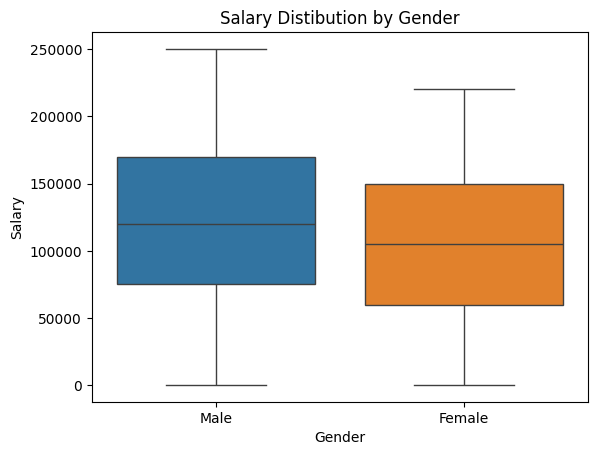

Gender        Female  Male
Salary Range              
0 - 50k         0.07  0.03
50 - 100k       0.13  0.17
100 - 150k      0.13  0.14
150 - 200k      0.11  0.18
200 - 250k      0.01  0.02 

The Chi-Square Statistic is: 171.91


In [658]:

#! Basic Data
sns.boxplot(data = salary_df, x = "Gender", y = "Salary", hue = "Gender")
plt.title("Salary Distibution by Gender")
plt.show()
plt.close()

#! Contingency Table making!
salary_df["Salary Range"] = salary_df["Salary"].apply(salary_range_funct)
salary_order = ['0 - 50k', '50 - 100k', '100 - 150k', '150 - 200k', '200 - 250k']

contingency_table = pd.crosstab(salary_df["Salary Range"], salary_df.Gender).reindex(salary_order)
contingency_freq_table = round(pd.crosstab(salary_df["Salary Range"], salary_df.Gender) / len(salary_df), 2).reindex(salary_order)

print(contingency_freq_table, '\n')

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"The Chi-Square Statistic is: {round(chi2, 2)}")

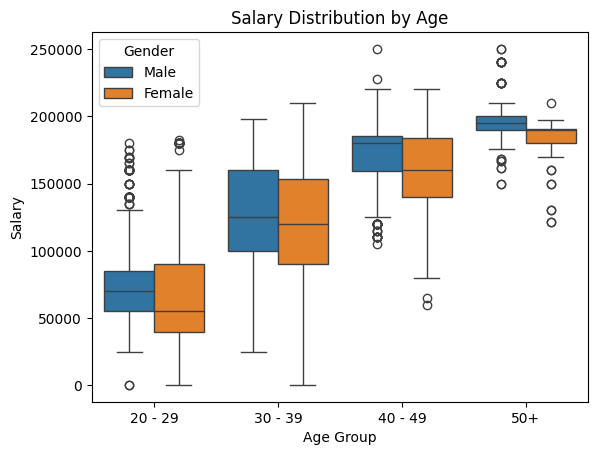

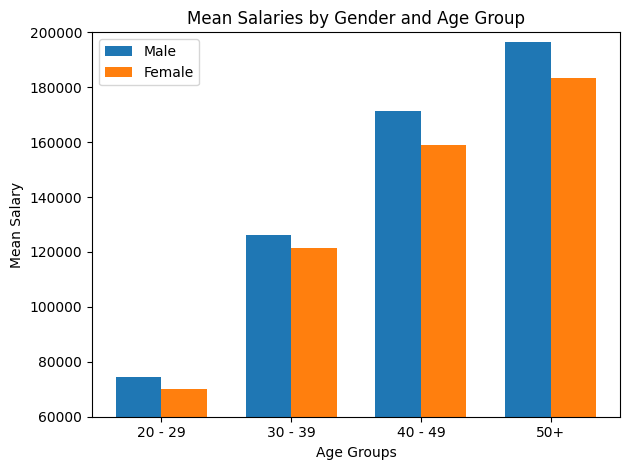

In [659]:

#?? -------- Markdonws in between!
#! Age
#* BoxPlot
salary_df["Age Group"] = salary_df.Age.apply(age_group_funct)
age_order = ["20 - 29", "30 - 39", "40 - 49", "50+"]

sns.boxplot(data = salary_df, x = "Age Group", y = "Salary", order = age_order, hue="Gender")
plt.title("Salary Distribution by Age")
plt.show()
plt.close()

#* Bar
male_means = [male_20_29_mean, male_30_39_mean, male_40_49_mean, male_50_100_mean]
female_means = [female_20_29_mean, female_30_39_mean, female_40_49_mean, female_50_100_mean]

bar_width = 0.35
x = range(len(age_order))
plt.bar(x, male_means, width=bar_width, label='Male', align='center')
plt.bar([i + bar_width for i in x], female_means, width=bar_width, label='Female', align='center')

plt.xlabel("Age Groups")
plt.ylabel("Mean Salary")
plt.title("Mean Salaries by Gender and Age Group")
plt.xticks([i + bar_width / 2 for i in x], age_order)
plt.legend()
plt.ylim(60000, 200000)  
plt.tight_layout()
plt.show()
plt.close()

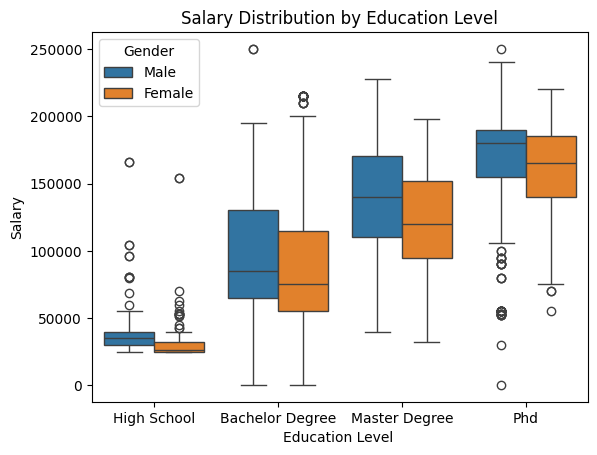

In [660]:
#! Education Level
salary_df["Education Level "] = salary_df["Education Level"].apply(education_level_funct)
ed_order = ["High School", "Bachelor Degree", "Master Degree", "Phd"]

sns.boxplot(data = salary_df, x = "Education Level ", y = "Salary", order = ed_order, hue="Gender")
plt.title("Salary Distribution by Education Level")
plt.show()
plt.close()

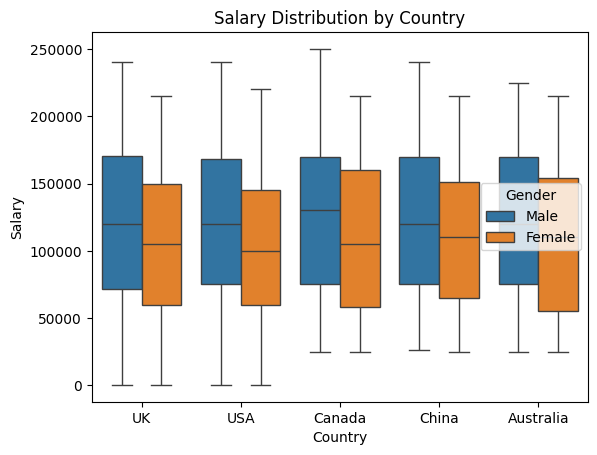

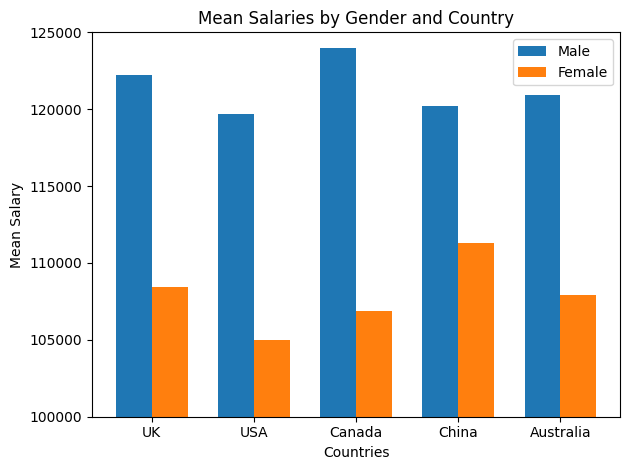

In [661]:

#! Country
#* Box plot!
sns.boxplot(data = salary_df, x = "Country", y = "Salary", hue="Gender")
plt.title("Salary Distribution by Country")
plt.show()
plt.close()

#* Bar graph..
countries = ["UK", "USA", "Canada", "China", "Australia"]
male_means = [male_UK_mean, male_USA_mean, male_Canada_mean, male_China_mean, male_Australia_mean]
female_means = [female_UK_mean, female_USA_mean, female_Canada_mean, female_China_mean, female_Australia_mean]

bar_width = 0.35
x = range(len(countries))
plt.bar(x, male_means, width=bar_width, label='Male', align='center')
plt.bar([i + bar_width for i in x], female_means, width=bar_width, label='Female', align='center')

plt.xlabel("Countries")
plt.ylabel("Mean Salary")
plt.title("Mean Salaries by Gender and Country")
plt.xticks([i + bar_width / 2 for i in x], countries)
plt.legend()
plt.ylim(100000, 125000)  
plt.tight_layout()
plt.show()
plt.close()

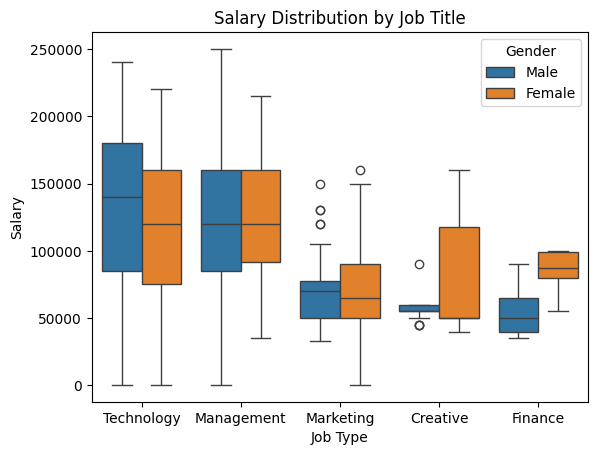

In [662]:

#! Job Titles
#* Boxplot
salary_df["Job Type"] = salary_df["Job Title"].apply(job_title_funct)

sns.boxplot(data = salary_df, x = "Job Type", y = "Salary", hue="Gender")
plt.title("Salary Distribution by Job Title")
plt.show()
plt.close()

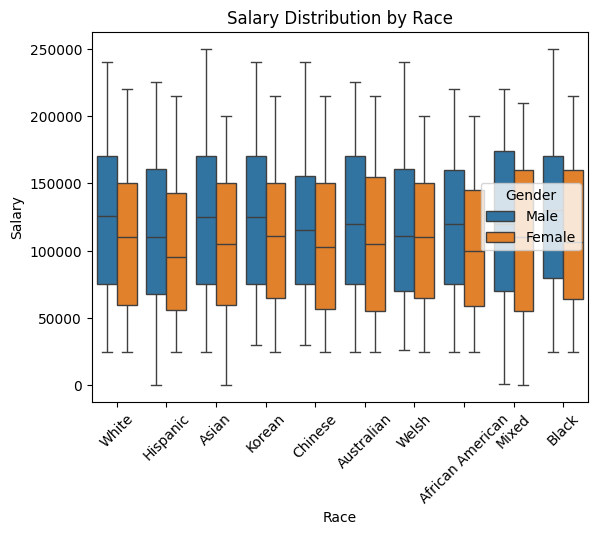

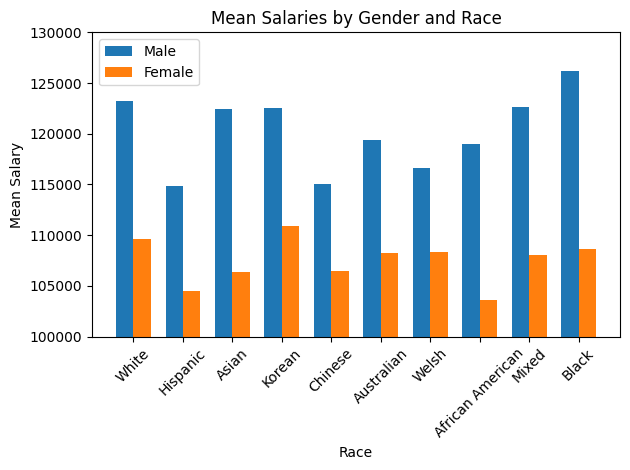

In [663]:

#! Race 
#* Boxplot
sns.boxplot(data = salary_df, x = "Race", y = "Salary", hue="Gender")
plt.title("Salary Distribution by Race")
plt.xticks(rotation = 45)
plt.show()
plt.close()

#* Bar graph
Race = ["White", "Hispanic", "Asian", "Korean", "Chinese", "Australian", "Welsh", "African American", "Mixed", "Black"]
male_means = [male_white_mean, male_Hispanic_mean, male_Asian_mean, male_Korean_mean, male_Chinese_mean, male_Australian_mean, male_Welsh_mean, male_African_American_mean, male_Mixed_mean, male_Black_mean]
female_means = [female_white_mean, female_Hispanic_mean, female_Asian_mean, female_Korean_mean, female_Chinese_mean, female_Australian_mean, female_Welsh_mean, female_African_American_mean, female_Mixed_mean, female_Black_mean]

bar_width = 0.35
x = range(len(Race))
plt.bar(x, male_means, width=bar_width, label='Male', align='center')
plt.bar([i + bar_width for i in x], female_means, width=bar_width, label='Female', align='center')

plt.xlabel("Race")
plt.ylabel("Mean Salary")
plt.title("Mean Salaries by Gender and Race")
plt.xticks([i + bar_width / 2 for i in x], Race, rotation = 45)
plt.legend()
plt.ylim(100000, 130000)  
plt.tight_layout()
plt.show()
plt.close()

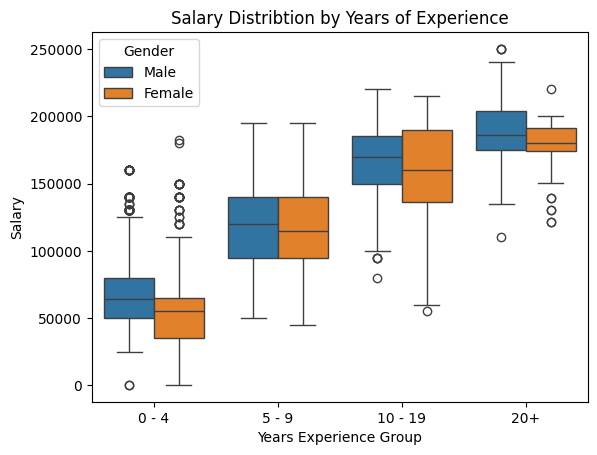

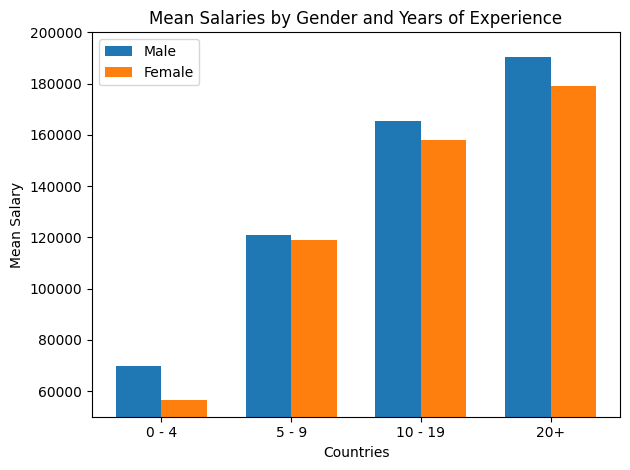

In [664]:

#! Years Experience
#* Boxplot
salary_df["Years Experience Group"] = salary_df["Years of Experience"].apply(years_exp_funct)
exp_order = ["0 - 4", "5 - 9", "10 - 19", "20+"]

sns.boxplot(data = salary_df, x = "Years Experience Group", y = "Salary", order = exp_order, hue="Gender")
plt.title("Salary Distribtion by Years of Experience")
plt.show()
plt.close()

#* Bar graph
years_exp_groups = ["0 - 4", "5 - 9", "10 - 19", "20+"]
male_means = [male_0_4_years_mean, male_5_9_years_mean, male_10_19_years_mean, male_20_plus_years_mean]
female_means = [female_0_4_years_mean, female_5_9_years_mean, female_10_19_years_mean, female_20_plus_years_mean]

bar_width = 0.35
x = range(len(years_exp_groups))
plt.bar(x, male_means, width=bar_width, label='Male', align='center')
plt.bar([i + bar_width for i in x], female_means, width=bar_width, label='Female', align='center')

plt.xlabel("Countries")
plt.ylabel("Mean Salary")
plt.title("Mean Salaries by Gender and Years of Experience")
plt.xticks([i + bar_width / 2 for i in x], years_exp_groups)
plt.legend()
plt.ylim(50000, 200000)  
plt.tight_layout()
plt.show()
plt.close()

## Cooking so much ..